In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

%matplotlib inline
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
import matplotlib.cm as cm
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
%matplotlib inline
from matplotlib import dates


#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('최종데이터/전체데이터_독립+종속_1720.csv')
df

,police,year,범죄발생_강도,범죄발생_살인,범죄발생_강간/강제추행,범죄검거_강간/강제추행,범죄검거_강도,범죄검거_살인,acc_case,경찰 수,...,천명당_공원수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,rob_safety_q1,mur_safety_q2,ta_safety_q3,law_order_q4,overall_q5
0,마산동부경찰서,0,0,0,5,5,0,0,30,185,...,0.320412,0.703934,3.562987,61.155591,6.313743,74.6,77.0,64.0,65.7,71.2
1,마산동부경찰서,1,0,0,6,5,0,0,36,185,...,0.324557,0.703934,3.573817,61.155591,7.472527,71.7,73.5,64.9,63.6,70.3
2,마산동부경찰서,2,0,0,5,4,0,0,34,185,...,0.328809,0.703934,3.584647,61.155591,9.313584,76.0,79.0,67.5,70.0,72.6
3,마산동부경찰서,3,0,0,6,6,0,0,31,185,...,0.333224,0.703934,3.584647,61.155591,9.941709,72.4,75.6,67.9,70.7,71.8
4,마산동부경찰서,4,0,0,7,6,0,0,36,185,...,0.337757,0.703934,3.595477,61.155591,11.609491,76.1,78.2,66.4,69.9,72.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,창원중부경찰서,2,1,0,8,6,1,0,56,201,...,0.386518,1.416245,5.748288,30.147271,9.309727,78.0,80.1,65.3,68.6,72.9
283,창원중부경찰서,3,1,0,6,6,1,0,58,201,...,0.388677,1.416245,5.789942,30.147271,10.205294,75.7,77.7,67.8,70.6,74.2
284,창원중부경찰서,4,0,0,8,7,0,0,52,201,...,0.390861,1.416245,5.800356,30.147271,13.308536,80.8,82.8,69.4,73.8,76.1
285,창원중부경찰서,5,0,0,7,11,0,0,56,201,...,0.392087,1.416245,5.852424,30.147271,14.349893,77.6,79.6,70.9,73.6,74.1


In [3]:
yay = ['police','law_order_q4','year','경찰서 수/면적','경찰 수/면적',
 '외국인_남성비율', '외국인_전체비율','기초생활수급_비율','천명당_신고_법질서',
 '천명당_경찰서수','천명당_경찰수','검거/발생_강간추행','천명당_유흥업소수',
 '천명당_cctv수', '면적당_공원수','면적당_유흥업소수','면적당_보안등수',
 '면적당_cctv수', '천명당_보안등수','천명당_공원수']

In [4]:
df=df[yay]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   police        287 non-null    object 
 1   law_order_q4  246 non-null    float64
 2   year          287 non-null    int64  
 3   경찰서 수/면적      287 non-null    float64
 4   경찰 수/면적       287 non-null    float64
 5   외국인_남성비율      287 non-null    float64
 6   외국인_전체비율      287 non-null    float64
 7   기초생활수급_비율     287 non-null    float64
 8   천명당_신고_법질서    287 non-null    float64
 9   천명당_경찰서수      287 non-null    float64
 10  천명당_경찰수       287 non-null    float64
 11  검거/발생_강간추행    287 non-null    float64
 12  천명당_유흥업소수     287 non-null    float64
 13  천명당_cctv수     287 non-null    float64
 14  면적당_공원수       287 non-null    float64
 15  면적당_유흥업소수     287 non-null    float64
 16  면적당_보안등수      287 non-null    float64
 17  면적당_cctv수     287 non-null    float64
 18  천명당_보안등수      287 non-null    

In [6]:
df_predict = df[df['year']==6].reset_index(drop=True)
df_predict

,police,law_order_q4,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,마산동부경찰서,NaN,6,0.075808,2.003503,0.537064,0.014104,0.032035,2.268818,0.036594,0.967123,1.400000,1.751277,6.367329,0.703934,3.627966,61.155591,13.190634,29.520777,0.339800
1,마산중부경찰서,NaN,6,0.034086,0.605026,0.583539,0.016111,0.034874,1.917867,0.045528,0.808122,1.333333,2.760136,5.184502,0.234341,2.066463,29.062562,3.881541,38.818320,0.313005
2,서울강남경찰서,NaN,6,0.657625,34.607520,0.497090,0.017206,0.023415,9.075905,0.029672,1.561486,1.285714,1.101571,11.479332,1.972875,24.414331,413.399562,254.418700,18.652523,0.089016
3,서울강동경찰서,NaN,6,0.383852,16.761537,0.455746,0.014320,0.025845,4.469857,0.019566,0.854404,1.300000,0.463074,5.528621,3.070816,9.084497,319.876653,108.459510,16.305411,0.156532
4,서울강북경찰서,NaN,6,0.379859,14.645660,0.374614,0.016828,0.057960,4.986123,0.029216,1.126422,1.333333,0.594050,7.462953,1.730467,7.723792,355.843118,97.032775,27.368489,0.133093
5,서울강서경찰서,NaN,6,0.261108,13.055378,0.433610,0.015343,0.042357,4.757103,0.017236,0.861794,1.250000,0.494670,4.096969,3.629395,7.493787,223.847505,62.065265,14.776321,0.239579
6,서울관악경찰서,NaN,6,0.304382,16.673374,0.455345,0.048673,0.033984,5.215529,0.018180,0.995839,1.230769,0.547408,9.746293,2.637978,9.165282,401.851979,163.182612,24.001131,0.157557
7,서울광진경찰서,NaN,6,0.456573,17.349773,0.440146,0.057638,0.029580,5.777629,0.028845,1.096105,1.250000,0.268257,18.630907,1.552348,4.246129,416.942446,294.900488,26.341143,0.098073
8,서울구로경찰서,NaN,6,0.397553,19.629189,0.542228,0.112782,0.025811,4.752626,0.019782,0.976736,0.933333,0.262112,9.047793,2.236237,5.267580,387.813147,181.830895,19.297343,0.111274
9,서울금천경찰서,NaN,6,0.386046,21.155319,0.533855,0.117014,0.044978,5.877454,0.021577,1.182395,1.200000,0.509207,18.236505,3.860460,9.110685,483.329561,326.286058,27.013848,0.215766


In [7]:
df = df[df['year']!=6].reset_index(drop=True)
df

,police,law_order_q4,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,마산동부경찰서,65.7,0,0.075808,2.003503,0.590253,0.013654,0.023321,2.361188,0.034506,0.911941,1.000000,1.621776,2.873847,0.703934,3.562987,61.155591,6.313743,27.836383,0.320412
1,마산동부경찰서,63.6,1,0.075808,2.003503,0.586282,0.013831,0.023653,2.391735,0.034952,0.923739,0.833333,1.647751,3.445297,0.703934,3.573817,61.155591,7.472527,28.196512,0.324557
2,마산동부경찰서,70.0,2,0.075808,2.003503,0.582671,0.014012,0.023684,2.423071,0.035410,0.935842,0.800000,1.674398,4.350399,0.703934,3.584647,61.155591,9.313584,28.565936,0.328809
3,마산동부경찰서,70.7,3,0.075808,2.003503,0.571631,0.014457,0.025371,2.388960,0.035886,0.948407,1.000000,1.696879,4.706148,0.703934,3.584647,61.155591,9.941709,28.949473,0.333224
4,마산동부경찰서,69.9,4,0.075808,2.003503,0.561129,0.014918,0.028340,2.769608,0.036374,0.961309,0.857143,1.725159,5.570394,0.703934,3.595477,61.155591,11.609491,29.343296,0.337757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,창원중부경찰서,65.6,1,0.062481,2.093127,0.684990,0.021297,0.020186,1.628155,0.017049,0.571133,1.000000,1.559960,2.329996,1.416245,5.717047,30.147271,8.539123,8.226021,0.386438
242,창원중부경찰서,68.6,2,0.062481,2.093127,0.675265,0.021705,0.019960,1.628493,0.017052,0.571252,0.750000,1.568810,2.540790,1.416245,5.748288,30.147271,9.309727,8.227728,0.386518
243,창원중부경찰서,70.6,3,0.062481,2.093127,0.668878,0.021975,0.021211,1.468970,0.017148,0.574442,1.000000,1.589003,2.800760,1.416245,5.789942,30.147271,10.205294,8.273674,0.388677
244,창원중부경찰서,73.8,4,0.062481,2.093127,0.662661,0.022245,0.023512,1.839345,0.017244,0.577669,0.875000,1.600805,3.672942,1.416245,5.800356,30.147271,13.308536,8.320161,0.390861


In [8]:
df2 = df.iloc[:,1:]
df2

,law_order_q4,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,65.7,0,0.075808,2.003503,0.590253,0.013654,0.023321,2.361188,0.034506,0.911941,1.000000,1.621776,2.873847,0.703934,3.562987,61.155591,6.313743,27.836383,0.320412
1,63.6,1,0.075808,2.003503,0.586282,0.013831,0.023653,2.391735,0.034952,0.923739,0.833333,1.647751,3.445297,0.703934,3.573817,61.155591,7.472527,28.196512,0.324557
2,70.0,2,0.075808,2.003503,0.582671,0.014012,0.023684,2.423071,0.035410,0.935842,0.800000,1.674398,4.350399,0.703934,3.584647,61.155591,9.313584,28.565936,0.328809
3,70.7,3,0.075808,2.003503,0.571631,0.014457,0.025371,2.388960,0.035886,0.948407,1.000000,1.696879,4.706148,0.703934,3.584647,61.155591,9.941709,28.949473,0.333224
4,69.9,4,0.075808,2.003503,0.561129,0.014918,0.028340,2.769608,0.036374,0.961309,0.857143,1.725159,5.570394,0.703934,3.595477,61.155591,11.609491,29.343296,0.337757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,65.6,1,0.062481,2.093127,0.684990,0.021297,0.020186,1.628155,0.017049,0.571133,1.000000,1.559960,2.329996,1.416245,5.717047,30.147271,8.539123,8.226021,0.386438
242,68.6,2,0.062481,2.093127,0.675265,0.021705,0.019960,1.628493,0.017052,0.571252,0.750000,1.568810,2.540790,1.416245,5.748288,30.147271,9.309727,8.227728,0.386518
243,70.6,3,0.062481,2.093127,0.668878,0.021975,0.021211,1.468970,0.017148,0.574442,1.000000,1.589003,2.800760,1.416245,5.789942,30.147271,10.205294,8.273674,0.388677
244,73.8,4,0.062481,2.093127,0.662661,0.022245,0.023512,1.839345,0.017244,0.577669,0.875000,1.600805,3.672942,1.416245,5.800356,30.147271,13.308536,8.320161,0.390861


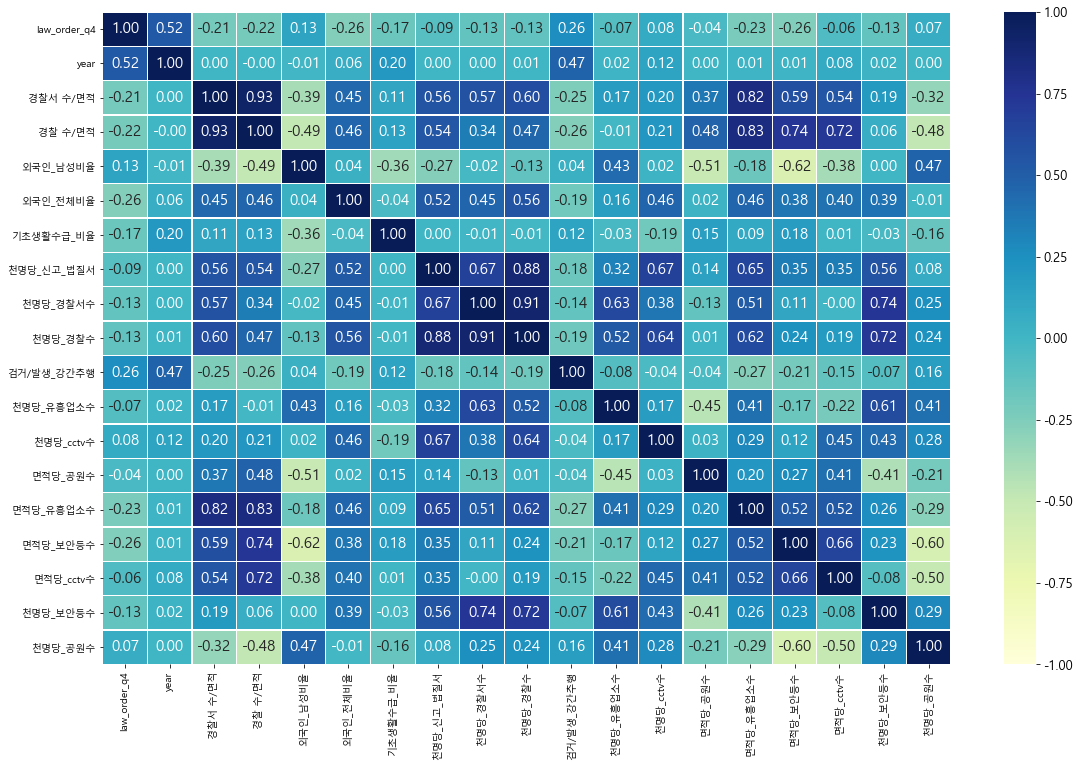

In [9]:
# 히트맵을 이용한 상관분석
plt.figure(figsize=(19,12))
ax = sns.heatmap(data=df2.corr(), annot=True, fmt = '.2f', linewidths=.10, cmap='YlGnBu', vmin = -1, vmax=1,annot_kws={"size": 15})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
# ax.set_xlabels(fontsize=10)
# plt.title('변수 간 상관계수 히트맵')
plt.show()

In [10]:
# StandardScaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
df2.iloc[:,1:]

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,0,0.075808,2.003503,0.590253,0.013654,0.023321,2.361188,0.034506,0.911941,1.000000,1.621776,2.873847,0.703934,3.562987,61.155591,6.313743,27.836383,0.320412
1,1,0.075808,2.003503,0.586282,0.013831,0.023653,2.391735,0.034952,0.923739,0.833333,1.647751,3.445297,0.703934,3.573817,61.155591,7.472527,28.196512,0.324557
2,2,0.075808,2.003503,0.582671,0.014012,0.023684,2.423071,0.035410,0.935842,0.800000,1.674398,4.350399,0.703934,3.584647,61.155591,9.313584,28.565936,0.328809
3,3,0.075808,2.003503,0.571631,0.014457,0.025371,2.388960,0.035886,0.948407,1.000000,1.696879,4.706148,0.703934,3.584647,61.155591,9.941709,28.949473,0.333224
4,4,0.075808,2.003503,0.561129,0.014918,0.028340,2.769608,0.036374,0.961309,0.857143,1.725159,5.570394,0.703934,3.595477,61.155591,11.609491,29.343296,0.337757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1,0.062481,2.093127,0.684990,0.021297,0.020186,1.628155,0.017049,0.571133,1.000000,1.559960,2.329996,1.416245,5.717047,30.147271,8.539123,8.226021,0.386438
242,2,0.062481,2.093127,0.675265,0.021705,0.019960,1.628493,0.017052,0.571252,0.750000,1.568810,2.540790,1.416245,5.748288,30.147271,9.309727,8.227728,0.386518
243,3,0.062481,2.093127,0.668878,0.021975,0.021211,1.468970,0.017148,0.574442,1.000000,1.589003,2.800760,1.416245,5.789942,30.147271,10.205294,8.273674,0.388677
244,4,0.062481,2.093127,0.662661,0.022245,0.023512,1.839345,0.017244,0.577669,0.875000,1.600805,3.672942,1.416245,5.800356,30.147271,13.308536,8.320161,0.390861


In [12]:
scaler = StandardScaler()
scaler.fit(df2.iloc[:,1:])
df2_scaled = scaler.transform(df2.iloc[:,1:])
df2_scaled = pd.DataFrame(df2_scaled, index=df2.iloc[:,1:].index, columns=df2.iloc[:,1:].columns)
df2_scaled

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,-1.46385,-0.849208,-1.229674,1.330305,-0.830226,-0.334887,-1.081249,-0.062000,-0.501768,0.317062,1.123087,-1.071395,-1.388508,-0.501474,-1.199226,-1.326108,0.148633,0.202354
1,-0.87831,-0.849208,-1.229674,1.274584,-0.824727,-0.297609,-1.071835,-0.047628,-0.486300,-0.286048,1.157690,-0.967970,-1.388508,-0.499973,-1.199226,-1.311719,0.174046,0.221072
2,-0.29277,-0.849208,-1.229674,1.223929,-0.819085,-0.294049,-1.062178,-0.032884,-0.470433,-0.406671,1.193189,-0.804159,-1.388508,-0.498472,-1.199226,-1.288857,0.200115,0.240272
3,0.29277,-0.849208,-1.229674,1.069018,-0.805249,-0.104465,-1.072690,-0.017578,-0.453959,0.317062,1.223139,-0.739773,-1.388508,-0.498472,-1.199226,-1.281057,0.227179,0.260206
4,0.87831,-0.849208,-1.229674,0.921650,-0.790877,0.229262,-0.955384,-0.001861,-0.437044,-0.199890,1.260814,-0.583356,-1.388508,-0.496971,-1.199226,-1.260347,0.254970,0.280675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.87831,-0.882338,-1.222024,2.659605,-0.592315,-0.687279,-1.307151,-0.624036,-0.948591,0.317062,1.040736,-1.169825,-0.842833,-0.202891,-1.351504,-1.298474,-1.235190,0.500487
242,-0.29277,-0.882338,-1.222024,2.523152,-0.579614,-0.712682,-1.307047,-0.623922,-0.948436,-0.587604,1.052526,-1.131674,-0.842833,-0.198560,-1.351504,-1.288905,-1.235069,0.500849
243,0.29277,-0.882338,-1.222024,2.433525,-0.571215,-0.571990,-1.356208,-0.620857,-0.944253,0.317062,1.079426,-1.084623,-0.842833,-0.192786,-1.351504,-1.277784,-1.231827,0.510595
244,0.87831,-0.882338,-1.222024,2.346304,-0.562808,-0.313424,-1.242068,-0.617755,-0.940022,-0.135271,1.095149,-0.926770,-0.842833,-0.191343,-1.351504,-1.239248,-1.228547,0.520456


In [13]:
# 통계 및 회귀 분석
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
# 정답 제거
df2_scaled_data = df2_scaled
df2_scaled_data

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,-1.46385,-0.849208,-1.229674,1.330305,-0.830226,-0.334887,-1.081249,-0.062000,-0.501768,0.317062,1.123087,-1.071395,-1.388508,-0.501474,-1.199226,-1.326108,0.148633,0.202354
1,-0.87831,-0.849208,-1.229674,1.274584,-0.824727,-0.297609,-1.071835,-0.047628,-0.486300,-0.286048,1.157690,-0.967970,-1.388508,-0.499973,-1.199226,-1.311719,0.174046,0.221072
2,-0.29277,-0.849208,-1.229674,1.223929,-0.819085,-0.294049,-1.062178,-0.032884,-0.470433,-0.406671,1.193189,-0.804159,-1.388508,-0.498472,-1.199226,-1.288857,0.200115,0.240272
3,0.29277,-0.849208,-1.229674,1.069018,-0.805249,-0.104465,-1.072690,-0.017578,-0.453959,0.317062,1.223139,-0.739773,-1.388508,-0.498472,-1.199226,-1.281057,0.227179,0.260206
4,0.87831,-0.849208,-1.229674,0.921650,-0.790877,0.229262,-0.955384,-0.001861,-0.437044,-0.199890,1.260814,-0.583356,-1.388508,-0.496971,-1.199226,-1.260347,0.254970,0.280675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.87831,-0.882338,-1.222024,2.659605,-0.592315,-0.687279,-1.307151,-0.624036,-0.948591,0.317062,1.040736,-1.169825,-0.842833,-0.202891,-1.351504,-1.298474,-1.235190,0.500487
242,-0.29277,-0.882338,-1.222024,2.523152,-0.579614,-0.712682,-1.307047,-0.623922,-0.948436,-0.587604,1.052526,-1.131674,-0.842833,-0.198560,-1.351504,-1.288905,-1.235069,0.500849
243,0.29277,-0.882338,-1.222024,2.433525,-0.571215,-0.571990,-1.356208,-0.620857,-0.944253,0.317062,1.079426,-1.084623,-0.842833,-0.192786,-1.351504,-1.277784,-1.231827,0.510595
244,0.87831,-0.882338,-1.222024,2.346304,-0.562808,-0.313424,-1.242068,-0.617755,-0.940022,-0.135271,1.095149,-0.926770,-0.842833,-0.191343,-1.351504,-1.239248,-1.228547,0.520456


In [15]:
# 학습용, 테스트용 데이터 자르기
X_train, X_test, y_train, y_test = train_test_split(df2_scaled_data, df2['law_order_q4'], test_size=0.25, random_state=1)
display(X_train)
display(y_train)

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
99,0.29277,0.037878,-0.098961,0.378510,-0.679047,-1.600319,-0.861432,-0.540443,-0.789479,-0.587604,-0.880412,0.592458,0.143698,-0.635529,0.216655,1.895551,-0.695897,-0.690009
238,0.87831,-0.961847,-1.333434,1.274485,-0.635116,-0.561513,-0.646029,0.336226,-0.109763,-0.587604,2.407540,-0.333099,-1.382621,-0.762141,-1.347835,-1.348335,1.535112,3.694243
47,1.46385,0.097358,0.080195,-0.685562,0.547296,0.059818,0.166348,-0.261457,-0.286931,1.221727,-0.686687,1.524807,-0.738570,-0.406781,0.548002,2.043750,0.008694,-0.809785
195,0.29277,2.777922,2.087364,-0.633970,1.252792,-0.309743,1.637842,2.119272,1.872134,-1.039936,1.346533,0.168977,-0.017100,2.727821,2.510394,0.408521,2.023182,-0.494108
40,0.87831,-0.280982,0.022462,-0.378289,0.298829,0.279711,-0.076354,-0.602343,-0.424598,-0.700687,-0.344882,0.128078,0.093089,0.242268,0.473895,0.621853,-0.164587,-0.550879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.46385,-0.149875,0.090156,-0.203078,-0.754535,-0.749574,-0.083769,-0.634935,-0.625873,2.005770,-0.559833,-0.840390,1.554122,0.066690,-0.093979,-0.303106,-0.870614,-0.284112
72,-1.46385,-0.077627,-0.275839,-1.299720,-1.009221,0.548404,-0.385647,-0.398503,-0.621207,0.769394,-0.777077,-0.998367,0.697819,-0.560420,0.002713,-0.751119,-0.471123,-0.280485
140,-0.29277,-0.445824,-0.344013,0.406198,-0.714966,-0.624976,-0.016213,-0.412123,-0.086336,0.038703,-0.465535,0.623188,0.199987,-0.395849,-0.908938,0.126379,-0.973283,0.000437
235,-0.87831,-0.961847,-1.333434,1.601893,-0.641466,-0.837383,-0.552874,0.364794,-0.079709,0.920172,2.440939,-0.750140,-1.382621,-0.764255,-1.347835,-1.367649,1.598541,3.787730


99     77.0
238    72.6
47     70.6
195    62.1
40     67.5
       ... 
137    75.0
72     65.5
140    74.0
235    66.4
37     59.2
Name: law_order_q4, Length: 184, dtype: float64

In [16]:
linear_model = sm.OLS(y_train, sm.add_constant(X_train))
linear_result = linear_model.fit()
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:           law_order_q4   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     10.18
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           8.88e-19
Time:                        01:38:44   Log-Likelihood:                -452.52
No. Observations:                 184   AIC:                             943.0
Df Residuals:                     165   BIC:                             1004.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8730      0.223    308.834      0.0

In [17]:
# 각 변수들의 p-value 데이터 프레임을 생성
df_pvalue = pd.DataFrame(linear_result.summary2().tables[1]['P>|t|'].round(2))
df_pvalue.drop('const',axis=0, inplace=True)
# 각 변수들의 VIF 데이터프레임 생성VIF 데이터프레임 생성
vif_xtrain = pd.DataFrame()
vif_xtrain["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_xtrain.index  = X_train.columns
vif_xtrain["VIF_Factor"]= round(vif_xtrain["VIF_Factor"],2)
# 두 데이터프레임 합치기
df_visual1 = df_pvalue.join(vif_xtrain, how='left')
df_visual1

,P>|t|,VIF_Factor
year,0.00,1.47
경찰서 수/면적,0.83,43.03
경찰 수/면적,0.70,82.43
외국인_남성비율,0.18,4.38
외국인_전체비율,0.00,2.59
기초생활수급_비율,0.00,1.42
천명당_신고_법질서,0.26,12.57
천명당_경찰서수,0.62,63.40
천명당_경찰수,0.60,118.33
검거/발생_강간추행,0.12,1.57


In [18]:
# 다중공선성이 높은변수들이 제거된 후 사용할 변수 리턴 함수
def feature_engineering_VIF(X_train, num) :
    '''
    X_train : 들어가는 df
    num : 상위 몇개 까지 쓸 것 인지의 파라미터
    '''
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                        for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor',ascending=True)['Feature'][:num].values
    return X_colname_vif

In [19]:
# 위의 변수 선택법으로 선택된 변수들로 새로운 데이터 생성
X_train2 = X_train[list(feature_engineering_VIF(X_train, 15))]
X_train2

,기초생활수급_비율,year,검거/발생_강간추행,외국인_전체비율,면적당_공원수,천명당_공원수,외국인_남성비율,천명당_유흥업소수,면적당_보안등수,천명당_보안등수,천명당_신고_법질서,면적당_유흥업소수,면적당_cctv수,천명당_cctv수,경찰서 수/면적
99,-1.600319,0.29277,-0.587604,-0.679047,0.143698,-0.690009,0.378510,-0.880412,0.216655,-0.695897,-0.861432,-0.635529,1.895551,0.592458,0.037878
238,-0.561513,0.87831,-0.587604,-0.635116,-1.382621,3.694243,1.274485,2.407540,-1.347835,1.535112,-0.646029,-0.762141,-1.348335,-0.333099,-0.961847
47,0.059818,1.46385,1.221727,0.547296,-0.738570,-0.809785,-0.685562,-0.686687,0.548002,0.008694,0.166348,-0.406781,2.043750,1.524807,0.097358
195,-0.309743,0.29277,-1.039936,1.252792,-0.017100,-0.494108,-0.633970,1.346533,2.510394,2.023182,1.637842,2.727821,0.408521,0.168977,2.777922
40,0.279711,0.87831,-0.700687,0.298829,0.093089,-0.550879,-0.378289,-0.344882,0.473895,-0.164587,-0.076354,0.242268,0.621853,0.128078,-0.280982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.749574,1.46385,2.005770,-0.754535,1.554122,-0.284112,-0.203078,-0.559833,-0.093979,-0.870614,-0.083769,0.066690,-0.303106,-0.840390,-0.149875
72,0.548404,-1.46385,0.769394,-1.009221,0.697819,-0.280485,-1.299720,-0.777077,0.002713,-0.471123,-0.385647,-0.560420,-0.751119,-0.998367,-0.077627
140,-0.624976,-0.29277,0.038703,-0.714966,0.199987,0.000437,0.406198,-0.465535,-0.908938,-0.973283,-0.016213,-0.395849,0.126379,0.623188,-0.445824
235,-0.837383,-0.87831,0.920172,-0.641466,-1.382621,3.787730,1.601893,2.440939,-1.347835,1.598541,-0.552874,-0.764255,-1.367649,-0.750140,-0.961847


In [20]:
# 최종선택된 변수들의 다중공선성 확인 -> 모두 10보다 작으므로 해결되었다
vif_xtrain2 = pd.DataFrame()
vif_xtrain2["VIF_Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif_xtrain2.index  = X_train2.columns
vif_xtrain2["VIF_Factor"]= round(vif_xtrain2["VIF_Factor"],2)
vif_xtrain2

,VIF_Factor
기초생활수급_비율,1.41
year,1.47
검거/발생_강간추행,1.52
외국인_전체비율,2.36
면적당_공원수,2.65
천명당_공원수,4.10
외국인_남성비율,4.19
천명당_유흥업소수,6.42
면적당_보안등수,6.40
천명당_보안등수,7.23


In [21]:
# 선형 회귀를 위해 선택된 변수들로 test데이터 재생성
X_test2 = X_test[list(feature_engineering_VIF(X_train, 15))]
X_test2

,기초생활수급_비율,year,검거/발생_강간추행,외국인_전체비율,면적당_공원수,천명당_공원수,외국인_남성비율,천명당_유흥업소수,면적당_보안등수,천명당_보안등수,천명당_신고_법질서,면적당_유흥업소수,면적당_cctv수,천명당_cctv수,경찰서 수/면적
67,1.964886,-0.87831,0.104199,-0.950289,1.651397,0.155115,-0.700238,-0.884142,-0.939270,-1.281573,-0.496240,-0.754919,-0.854210,-1.059444,-0.481266
245,-0.175847,1.46385,2.384868,-0.596985,-0.842833,0.525992,2.127039,1.121042,-1.351504,-1.226705,-1.174544,-0.184126,-1.226317,-0.872506,-0.882338
208,-1.506911,0.87831,-0.784270,-0.195342,0.817200,0.552868,0.353203,-0.267120,-1.065937,-1.123526,-0.404056,-0.273820,-0.276188,0.235270,-0.495978
222,0.728502,-1.46385,-1.327784,-0.758384,-1.791531,0.379124,1.669158,0.260024,-1.457283,-0.587587,-1.201648,-0.928585,-1.383975,-0.986371,-0.992410
90,-0.779098,-1.46385,-0.859003,-0.245854,0.261034,-0.240572,-1.068206,-0.611242,-0.208149,-0.371790,0.673429,-0.425429,-0.865818,-0.980614,-0.344697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,3.115825,0.87831,-1.233793,-0.707616,-0.602120,-0.635179,-1.471498,-0.257072,0.247951,0.142208,-0.121340,0.046021,-0.476311,-0.536708,-0.093351
16,-0.452982,0.87831,0.317062,-0.660804,-0.416420,-0.818772,0.773870,0.432902,0.530604,-0.421804,1.255907,2.206509,1.744593,0.601512,0.597165
244,-0.313424,0.87831,-0.135271,-0.562808,-0.842833,0.520456,2.346304,1.095149,-1.351504,-1.228547,-1.242068,-0.191343,-1.239248,-0.926770,-0.882338
232,0.255310,0.87831,0.317062,-0.453402,-1.260428,1.262993,2.034380,1.035341,-1.369681,-0.626044,-1.109850,-0.657026,-1.301133,-0.631052,-0.915084


In [22]:
# 평가 함수 생성
def MAE_func(test, pred):
    rms = mean_absolute_error(test, pred)
    return rms

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train2,y_train)
print(lr_model.score(X_train2, y_train))
print(lr_model.score(X_test2, y_test))

y_pred = lr_model.predict(X_test2)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.5232022547717226
0.4969008863923289
3.0323780816906294
1.7413724706939149


In [24]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)}

In [25]:
# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        X_train, y_train).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        X_train, y_train).best_estimator_,}

C:\Users\jinta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3457782165223762, tolerance: 0.2407975918367347
  model = cd_fast.enet_coordinate_descent(
C:\Users\jinta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.605862770829958, tolerance: 0.24053829729729734
  model = cd_fast.enet_coordinate_descent(


In [26]:
# Lasso 모델의 파라미터 
linear_models['Lasso']

Lasso(alpha=0.1)

In [27]:
# 결정계수와 오차
print(linear_models['Lasso'].score(X_train,y_train))
print(linear_models['Lasso'].score(X_test,y_test))

y_pred = linear_models['Lasso'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.49666166109057497
0.4625709795109001
3.1341308897658715
1.770347674827143


In [28]:
linear_models['Ridge']

Ridge(alpha=10.0)

In [29]:
# 결정계수와 오차
print(linear_models['Ridge'].score(X_train,y_train))
print(linear_models['Ridge'].score(X_test,y_test))

y_pred = linear_models['Ridge'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.516098826854927
0.4855350581805764
3.0664399571755983
1.7511253402242795


In [30]:
# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, 10, 12]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
RF_models = {
    'RF':GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [31]:
RF_models['RF']

RandomForestRegressor(max_depth=6, random_state=42)

In [32]:
# 결정계수와 오차
print(RF_models['RF'].score(X_train,y_train))
print(RF_models['RF'].score(X_test,y_test))

y_pred = RF_models['RF'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.8870306757952637
0.5498071935766244
2.8685065663393052
1.693666604246333


In [33]:
# parameter 범위를 정의한다.
XGB_params = {
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
XGB_models = {
    'XGB':GridSearchCV(
    xgb.XGBRegressor(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [34]:
XGB_models['XGB']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# 결정계수와 오차
print(XGB_models['XGB'].score(X_train,y_train))
print(XGB_models['XGB'].score(X_test,y_test))

y_pred = XGB_models['XGB'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.9999991145695077
0.638684115425909
2.569804588561236
1.6030610058763317


In [36]:
# parameter 범위를 정의한다.
LGBM_params = {
    'n_estimators':[100,200,1000],
    'max_depth':[3, 5, 7, 10],
    'learning_rate':[0.01, 0.05, 0.1]
}

# GridSearchCV를 이용하여 dict에 Randomforest 모델을 저장한다.
LGBM_models = {
    'LGBM':GridSearchCV(
    LGBMRegressor(random_state=42), param_grid=LGBM_params, n_jobs=-1).fit(X_train,y_train).best_estimator_
}

In [37]:
LGBM_models['LGBM']

LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000,
              random_state=42)

In [38]:
# 결정계수와 오차
print(LGBM_models['LGBM'].score(X_train,y_train))
print(LGBM_models['LGBM'].score(X_test,y_test))

y_pred = LGBM_models['LGBM'].predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms2 = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(rms)  # MSE 오차
print(rms2)  # RMSE 오차

0.906409908727718
0.5687695309128968
2.807445228480939
1.675543263685226


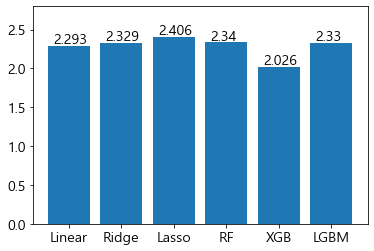

In [51]:
lr_pred = lr_model.predict(X_test2)
Ridge_pred = linear_models['Ridge'].predict(X_test)
Lasso_pred = linear_models['Lasso'].predict(X_test)
RF_pred = RF_models['RF'].predict(X_test)
XGB_pred = XGB_models['XGB'].predict(X_test)
LGBM_pred = LGBM_models['LGBM'].predict(X_test)

# test 데이터의 MSE 계산
mse_score = [MAE_func(y_test, lr_pred),
             MAE_func(y_test, Ridge_pred),
             MAE_func(y_test, Lasso_pred),
             MAE_func(y_test, RF_pred),
             MAE_func(y_test, XGB_pred),
             MAE_func(y_test, LGBM_pred)]

x_lab = ['Linear','Ridge','Lasso','RF','XGB','LGBM']

plt.bar(x_lab, mse_score)
# plt.title('MAE of Q3', fontsize=20)
# plt.xlabel('model', fontsize=18)
plt.ylabel('',fontsize=30)
plt.ylim(0.0, 2.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(mse_score) :
    plt.text(i-0.3, v+0.03, str(np.round(v,3)), fontsize=14)
    
plt.show()

In [40]:
df_predict

,police,law_order_q4,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,마산동부경찰서,NaN,6,0.075808,2.003503,0.537064,0.014104,0.032035,2.268818,0.036594,0.967123,1.400000,1.751277,6.367329,0.703934,3.627966,61.155591,13.190634,29.520777,0.339800
1,마산중부경찰서,NaN,6,0.034086,0.605026,0.583539,0.016111,0.034874,1.917867,0.045528,0.808122,1.333333,2.760136,5.184502,0.234341,2.066463,29.062562,3.881541,38.818320,0.313005
2,서울강남경찰서,NaN,6,0.657625,34.607520,0.497090,0.017206,0.023415,9.075905,0.029672,1.561486,1.285714,1.101571,11.479332,1.972875,24.414331,413.399562,254.418700,18.652523,0.089016
3,서울강동경찰서,NaN,6,0.383852,16.761537,0.455746,0.014320,0.025845,4.469857,0.019566,0.854404,1.300000,0.463074,5.528621,3.070816,9.084497,319.876653,108.459510,16.305411,0.156532
4,서울강북경찰서,NaN,6,0.379859,14.645660,0.374614,0.016828,0.057960,4.986123,0.029216,1.126422,1.333333,0.594050,7.462953,1.730467,7.723792,355.843118,97.032775,27.368489,0.133093
5,서울강서경찰서,NaN,6,0.261108,13.055378,0.433610,0.015343,0.042357,4.757103,0.017236,0.861794,1.250000,0.494670,4.096969,3.629395,7.493787,223.847505,62.065265,14.776321,0.239579
6,서울관악경찰서,NaN,6,0.304382,16.673374,0.455345,0.048673,0.033984,5.215529,0.018180,0.995839,1.230769,0.547408,9.746293,2.637978,9.165282,401.851979,163.182612,24.001131,0.157557
7,서울광진경찰서,NaN,6,0.456573,17.349773,0.440146,0.057638,0.029580,5.777629,0.028845,1.096105,1.250000,0.268257,18.630907,1.552348,4.246129,416.942446,294.900488,26.341143,0.098073
8,서울구로경찰서,NaN,6,0.397553,19.629189,0.542228,0.112782,0.025811,4.752626,0.019782,0.976736,0.933333,0.262112,9.047793,2.236237,5.267580,387.813147,181.830895,19.297343,0.111274
9,서울금천경찰서,NaN,6,0.386046,21.155319,0.533855,0.117014,0.044978,5.877454,0.021577,1.182395,1.200000,0.509207,18.236505,3.860460,9.110685,483.329561,326.286058,27.013848,0.215766


In [41]:
df_predict2 = df_predict.iloc[:,2:]
df_predict2

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,6,0.075808,2.003503,0.537064,0.014104,0.032035,2.268818,0.036594,0.967123,1.400000,1.751277,6.367329,0.703934,3.627966,61.155591,13.190634,29.520777,0.339800
1,6,0.034086,0.605026,0.583539,0.016111,0.034874,1.917867,0.045528,0.808122,1.333333,2.760136,5.184502,0.234341,2.066463,29.062562,3.881541,38.818320,0.313005
2,6,0.657625,34.607520,0.497090,0.017206,0.023415,9.075905,0.029672,1.561486,1.285714,1.101571,11.479332,1.972875,24.414331,413.399562,254.418700,18.652523,0.089016
3,6,0.383852,16.761537,0.455746,0.014320,0.025845,4.469857,0.019566,0.854404,1.300000,0.463074,5.528621,3.070816,9.084497,319.876653,108.459510,16.305411,0.156532
4,6,0.379859,14.645660,0.374614,0.016828,0.057960,4.986123,0.029216,1.126422,1.333333,0.594050,7.462953,1.730467,7.723792,355.843118,97.032775,27.368489,0.133093
5,6,0.261108,13.055378,0.433610,0.015343,0.042357,4.757103,0.017236,0.861794,1.250000,0.494670,4.096969,3.629395,7.493787,223.847505,62.065265,14.776321,0.239579
6,6,0.304382,16.673374,0.455345,0.048673,0.033984,5.215529,0.018180,0.995839,1.230769,0.547408,9.746293,2.637978,9.165282,401.851979,163.182612,24.001131,0.157557
7,6,0.456573,17.349773,0.440146,0.057638,0.029580,5.777629,0.028845,1.096105,1.250000,0.268257,18.630907,1.552348,4.246129,416.942446,294.900488,26.341143,0.098073
8,6,0.397553,19.629189,0.542228,0.112782,0.025811,4.752626,0.019782,0.976736,0.933333,0.262112,9.047793,2.236237,5.267580,387.813147,181.830895,19.297343,0.111274
9,6,0.386046,21.155319,0.533855,0.117014,0.044978,5.877454,0.021577,1.182395,1.200000,0.509207,18.236505,3.860460,9.110685,483.329561,326.286058,27.013848,0.215766


In [42]:
# scaler적용
df_predict2_scaled  = scaler.transform(df_predict2)
df_predict2_scaled = pd.DataFrame(df_predict2_scaled, index=df_predict2.index, columns=df_predict2.columns)
df_predict2_scaled

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수
0,2.04939,-0.849208,-1.229674,0.583997,-0.816222,0.644545,-1.109715,0.005222,-0.429421,1.764526,1.295607,-0.439121,-1.388508,-0.492467,-1.199226,-1.240712,0.267494,0.289899
1,2.04939,-0.952927,-1.349040,1.236107,-0.753745,0.963650,-1.217869,0.292860,-0.637882,1.523282,2.639607,-0.653197,-1.748244,-0.708914,-1.356831,-1.356311,0.923584,0.168911
2,2.04939,0.597165,1.553217,0.023096,-0.719663,-0.324341,0.988058,-0.217630,0.349830,1.350965,0.430070,0.486085,-0.416420,2.388821,0.530604,1.754801,-0.499434,-0.842478
3,2.04939,-0.083424,0.029987,-0.557016,-0.809492,-0.051190,-0.431410,-0.542977,-0.577204,1.402660,-0.420534,-0.590916,0.424670,0.263886,0.071323,-0.057686,-0.665060,-0.537619
4,2.04939,-0.093351,-0.150612,-1.695414,-0.731426,3.558378,-0.272310,-0.232323,-0.220568,1.523282,-0.246048,-0.240827,-0.602120,0.075273,0.247951,-0.199580,0.115616,-0.643454
5,2.04939,-0.388561,-0.286350,-0.867612,-0.777649,1.804664,-0.342888,-0.618011,-0.567514,1.221727,-0.378442,-0.850026,0.852576,0.043391,-0.400265,-0.633799,-0.772962,-0.162634
6,2.04939,-0.280982,0.022462,-0.562641,0.259930,0.863540,-0.201613,-0.587628,-0.391772,1.152137,-0.308184,0.172428,0.093089,0.275084,0.473895,0.621853,-0.122005,-0.532992
7,2.04939,0.097358,0.080195,-0.775907,0.539017,0.368631,-0.028388,-0.244257,-0.260316,1.221727,-0.680068,1.780427,-0.738570,-0.406781,0.548002,2.257495,0.043120,-0.801583
8,2.04939,-0.049363,0.274753,0.656443,2.255711,-0.055079,-0.344268,-0.536039,-0.416817,0.075818,-0.688255,0.046009,-0.214669,-0.265193,0.404952,0.853423,-0.453932,-0.741975
9,2.04939,-0.077969,0.405015,0.538957,2.387452,2.099283,0.002376,-0.478263,-0.147184,1.040794,-0.359076,1.709046,1.029585,0.267516,0.874022,2.647233,0.090590,-0.270159


In [43]:
df_predict2_scaled['XGB_예측점수'] = XGB_models['XGB'].predict(df_predict2_scaled)
df_predict2_scaled

,year,경찰서 수/면적,경찰 수/면적,외국인_남성비율,외국인_전체비율,기초생활수급_비율,천명당_신고_법질서,천명당_경찰서수,천명당_경찰수,검거/발생_강간추행,천명당_유흥업소수,천명당_cctv수,면적당_공원수,면적당_유흥업소수,면적당_보안등수,면적당_cctv수,천명당_보안등수,천명당_공원수,XGB_예측점수
0,2.04939,-0.849208,-1.229674,0.583997,-0.816222,0.644545,-1.109715,0.005222,-0.429421,1.764526,1.295607,-0.439121,-1.388508,-0.492467,-1.199226,-1.240712,0.267494,0.289899,70.689751
1,2.04939,-0.952927,-1.349040,1.236107,-0.753745,0.963650,-1.217869,0.292860,-0.637882,1.523282,2.639607,-0.653197,-1.748244,-0.708914,-1.356831,-1.356311,0.923584,0.168911,72.425140
2,2.04939,0.597165,1.553217,0.023096,-0.719663,-0.324341,0.988058,-0.217630,0.349830,1.350965,0.430070,0.486085,-0.416420,2.388821,0.530604,1.754801,-0.499434,-0.842478,73.948441
3,2.04939,-0.083424,0.029987,-0.557016,-0.809492,-0.051190,-0.431410,-0.542977,-0.577204,1.402660,-0.420534,-0.590916,0.424670,0.263886,0.071323,-0.057686,-0.665060,-0.537619,71.634933
4,2.04939,-0.093351,-0.150612,-1.695414,-0.731426,3.558378,-0.272310,-0.232323,-0.220568,1.523282,-0.246048,-0.240827,-0.602120,0.075273,0.247951,-0.199580,0.115616,-0.643454,68.149872
5,2.04939,-0.388561,-0.286350,-0.867612,-0.777649,1.804664,-0.342888,-0.618011,-0.567514,1.221727,-0.378442,-0.850026,0.852576,0.043391,-0.400265,-0.633799,-0.772962,-0.162634,69.667900
6,2.04939,-0.280982,0.022462,-0.562641,0.259930,0.863540,-0.201613,-0.587628,-0.391772,1.152137,-0.308184,0.172428,0.093089,0.275084,0.473895,0.621853,-0.122005,-0.532992,65.999672
7,2.04939,0.097358,0.080195,-0.775907,0.539017,0.368631,-0.028388,-0.244257,-0.260316,1.221727,-0.680068,1.780427,-0.738570,-0.406781,0.548002,2.257495,0.043120,-0.801583,70.705986
8,2.04939,-0.049363,0.274753,0.656443,2.255711,-0.055079,-0.344268,-0.536039,-0.416817,0.075818,-0.688255,0.046009,-0.214669,-0.265193,0.404952,0.853423,-0.453932,-0.741975,67.971428
9,2.04939,-0.077969,0.405015,0.538957,2.387452,2.099283,0.002376,-0.478263,-0.147184,1.040794,-0.359076,1.709046,1.029585,0.267516,0.874022,2.647233,0.090590,-0.270159,66.265411


In [44]:
df_predict2_scaled['police'] = df_predict['police']
df_rf_model = df_predict2_scaled[['police','XGB_예측점수']]
df_rf_model

,police,XGB_예측점수
0,마산동부경찰서,70.689751
1,마산중부경찰서,72.425140
2,서울강남경찰서,73.948441
3,서울강동경찰서,71.634933
4,서울강북경찰서,68.149872
5,서울강서경찰서,69.667900
6,서울관악경찰서,65.999672
7,서울광진경찰서,70.705986
8,서울구로경찰서,67.971428
9,서울금천경찰서,66.265411


In [45]:
df_rf_model.columns = ['경찰서명','XGB_예측점수']

In [46]:
df_rf_model

,경찰서명,XGB_예측점수
0,마산동부경찰서,70.689751
1,마산중부경찰서,72.425140
2,서울강남경찰서,73.948441
3,서울강동경찰서,71.634933
4,서울강북경찰서,68.149872
5,서울강서경찰서,69.667900
6,서울관악경찰서,65.999672
7,서울광진경찰서,70.705986
8,서울구로경찰서,67.971428
9,서울금천경찰서,66.265411


In [47]:
df_rf_model.to_csv('법질서안전도_예측점수2.csv',encoding='utf-8-sig')

In [48]:
df_rf_model_order = df_rf_model.sort_values(by = 'XGB_예측점수', ascending=False)

In [49]:
df_rf_model_order

,경찰서명,XGB_예측점수
23,서울수서경찰서,75.818207
16,서울방배경찰서,75.773964
19,서울서초경찰서,75.528351
37,진주경찰서,74.598366
22,서울송파경찰서,74.262138
2,서울강남경찰서,73.948441
26,서울용산경찰서,73.850616
34,수원남부경찰서,73.847084
20,서울성동경찰서,73.471695
28,서울종로경찰서,73.343758


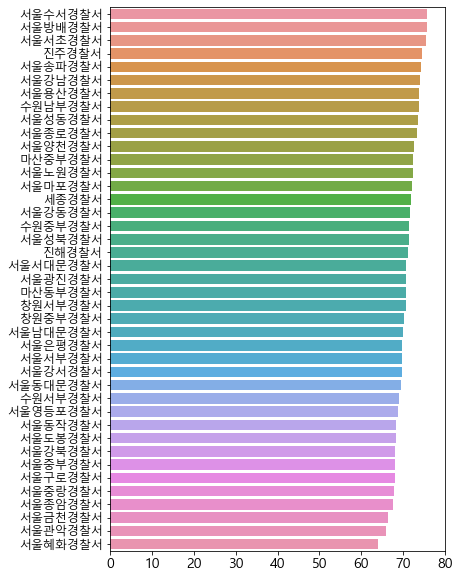

In [50]:
# 예측 시각화
plt.figure(figsize=(6,10))
sns.barplot(y='경찰서명',x='XGB_예측점수', data = df_rf_model_order)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,80)
plt.show()

In [52]:
# 독립변수 계수 상위 10개, 하위 10개 추출함수
def get_top_bottom_coef(model, features) :
    coef = pd.Series(model.coef_, index= features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(6)
    coef_low = coef.sort_values(ascending=False).tail(6)
    
    return coef_high, coef_low

In [57]:
# 계수를 시각화 - 모델별로 그림을 그린다. 
def visualize_coefficient(models, features=X_test2) :
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    pal = 'pastel'
    for idx, model in enumerate(models) :
        if model != lr_model :
            features = X_test
        coef_high, coef_low = get_top_bottom_coef(model, features)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axes[idx].set_title(model.__class__.__name__+' 변수중요도', size=25)
        axes[idx].tick_params(axis='y', direction='in', pad=-300)
        axes[idx].set_xlim(-2.5,2.5)
        for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()) :
            label.set_fontsize(22)
    
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axes[idx], palette=pal)

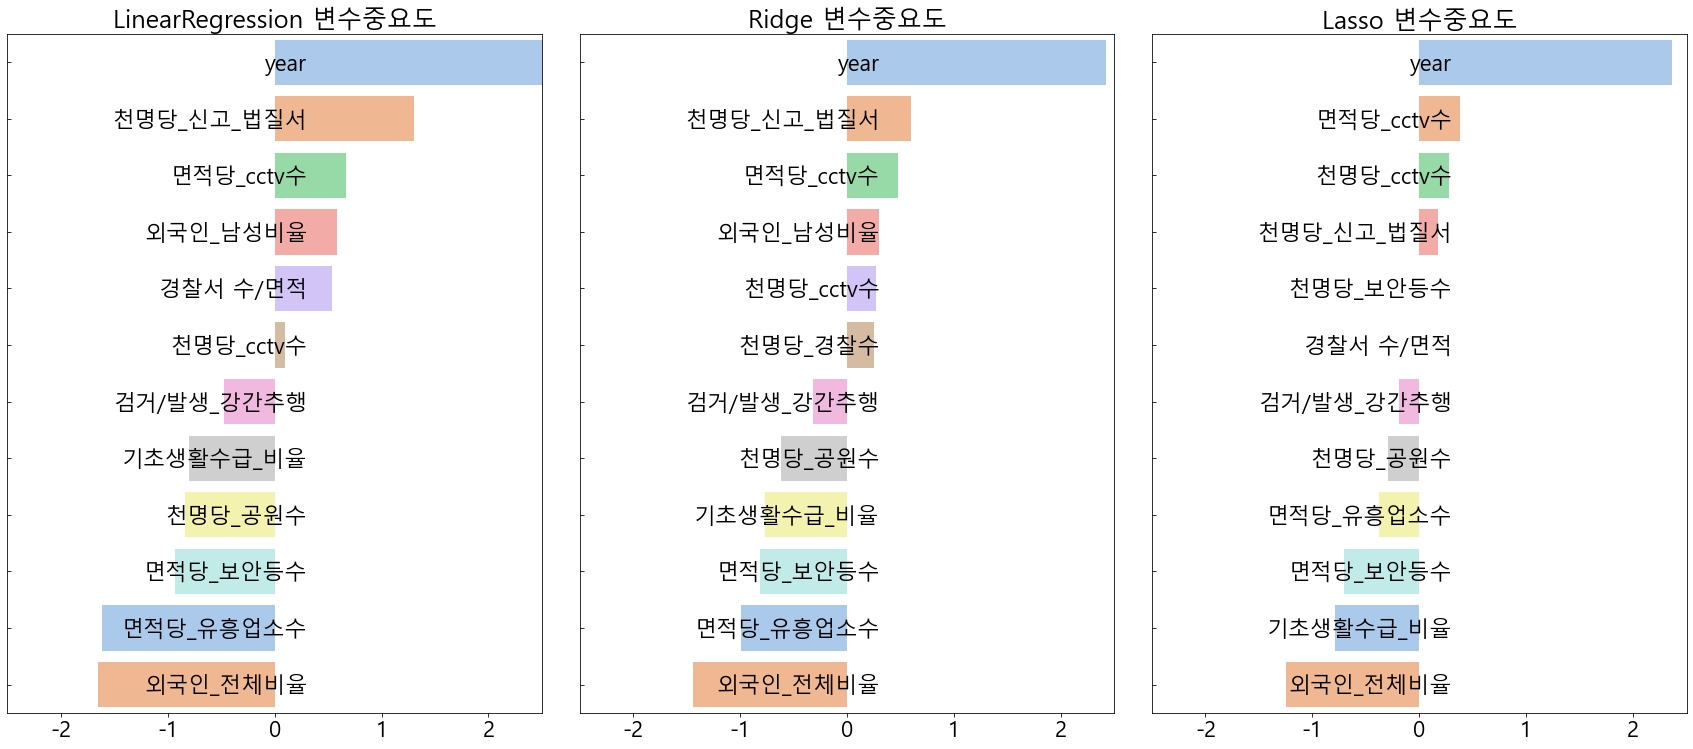

In [58]:
models = [lr_model, linear_models['Ridge'], linear_models['Lasso']]
visualize_coefficient(models, X_test2)

In [59]:
features = X_train.columns.values

In [60]:
x,y = (list(x) for x in zip(*sorted(zip(RF_models['RF'].feature_importances_, features), reverse=True)))

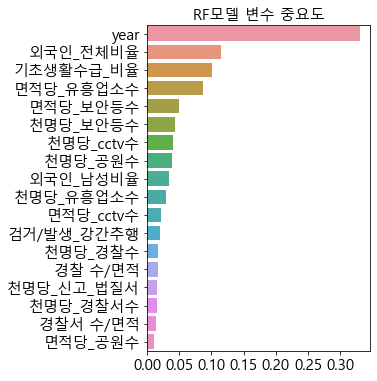

In [61]:
plt.figure(figsize=(4,6))
sns.barplot(x=x,y=y)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('RF모델 변수 중요도',fontsize=15)
plt.show()

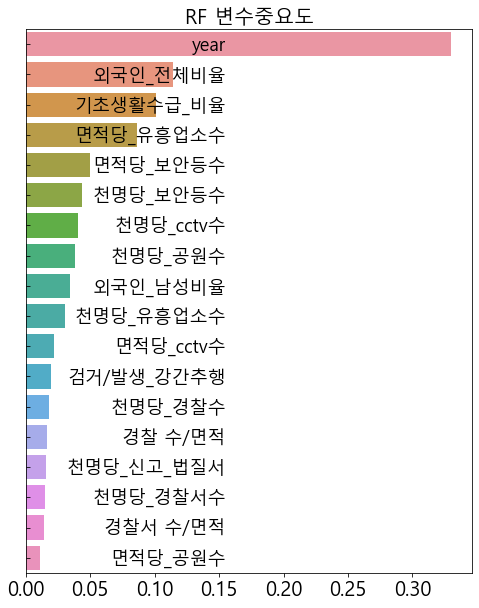

In [62]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('RF 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [63]:
x,y = (list(x) for x in zip(*sorted(zip(XGB_models['XGB'].feature_importances_, features), reverse=True)))

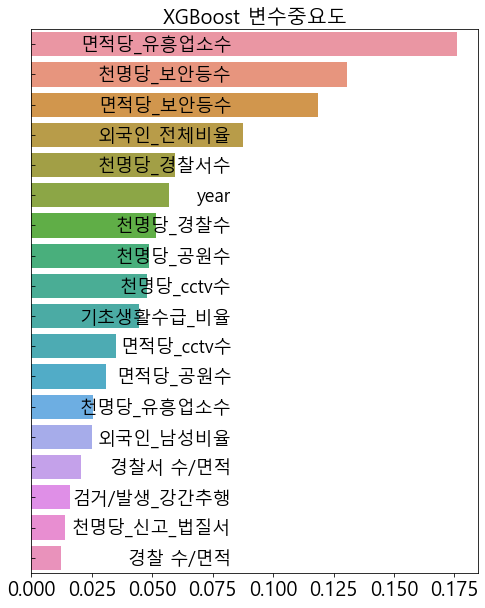

In [64]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('XGBoost 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()

In [65]:
x,y = (list(x) for x in zip(*sorted(zip(LGBM_models['LGBM'].feature_importances_, features), reverse=True)))

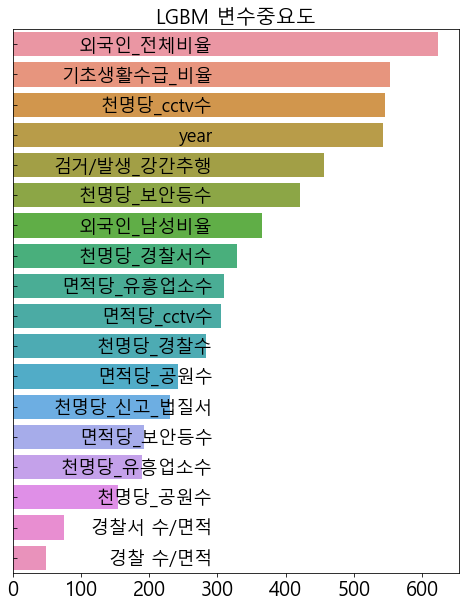

In [66]:
fig, ax = plt.subplots(figsize=(8,10), nrows=1, ncols=1)
sns.barplot(x=x,y=y)
ax.tick_params(axis='y', direction='in', pad=-200)
plt.title('LGBM 변수중요도',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.show()